In [39]:
import random
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [40]:
d1=[]
d2=[]
d3=[]
d4=[]
for i in range(50000):
    x=random.random()
    d1.append(x)
    y=random.random()
    d2.append(y)
    z=random.random()
    d3.append(z)
    d4.append(2*x+3*y+z)

In [45]:
df=pd.DataFrame({'x1':d1,'x2':d2,'x3':d3,'x4':d4},index=range(0,50000))

In [46]:
df

,x1,x2,x3,x4
0,0.326045,0.650241,0.167698,2.770511
1,0.837068,0.682782,0.778179,4.500661
2,0.023471,0.801235,0.140595,2.591243
3,0.331136,0.741039,0.776400,3.661789
4,0.953667,0.624469,0.659746,4.440488
...,...,...,...,...
49995,0.647307,0.294177,0.771512,2.948657
49996,0.363181,0.893179,0.188536,3.594436
49997,0.475285,0.652112,0.362982,3.269889
49998,0.348649,0.488952,0.009635,2.173788


In [47]:
import random

# Generate random data
d1 = [random.random() for _ in range(50000)]
d2 = [random.random() for _ in range(50000)]
d3 = [random.random() for _ in range(50000)]
d4 = [2 * x + 3 * y + z for x, y, z in zip(d1, d2, d3)]

# Create DataFrame
df = pd.DataFrame({'x1': d1, 'x2': d2, 'x3': d3, 'x4': d4})

# Define bin edges and labels
bins = [df["x4"].min(), df["x4"].quantile(0.50),df["x4"].max()]
labels = ["Low", "High"]

# Create x5 column with bins
df["x5"] = pd.cut(df["x4"], bins=bins, labels=labels, include_lowest=True)

# Display first few rows
print(df.head())

         x1        x2        x3        x4    x5
0  0.512787  0.826210  0.544354  4.048560  High
1  0.955310  0.769977  0.318760  4.539309  High
2  0.071535  0.633909  0.193316  2.238114   Low
3  0.530895  0.174457  0.002348  1.587508   Low
4  0.491484  0.837153  0.303932  3.798360  High


In [64]:
df["x5_encoded"] = df["x5"].map({"Low": -1, "High": 1,"Medium":0})

In [65]:
df["x5_encoded"] = df["x5_encoded"].astype(int)

In [66]:
X = df.iloc[:,0:3]
Y = df.iloc[:,5]

In [67]:
X

,x1,x2,x3
0,0.512787,0.826210,0.544354
1,0.955310,0.769977,0.318760
2,0.071535,0.633909,0.193316
3,0.530895,0.174457,0.002348
4,0.491484,0.837153,0.303932
...,...,...,...
49995,0.510291,0.403649,0.243078
49996,0.932557,0.472495,0.683625
49997,0.188395,0.727961,0.148521
49998,0.518018,0.505121,0.025666


In [68]:
Y

0        1
1        1
2       -1
3       -1
4        1
        ..
49995   -1
49996    1
49997   -1
49998   -1
49999    1
Name: x5_encoded, Length: 50000, dtype: int32

In [69]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [70]:
df.head()

,x1,x2,x3,x4,x5,x5_encoded
0,0.512787,0.826210,0.544354,4.048560,High,1
1,0.955310,0.769977,0.318760,4.539309,High,1
2,0.071535,0.633909,0.193316,2.238114,Low,-1
3,0.530895,0.174457,0.002348,1.587508,Low,-1
4,0.491484,0.837153,0.303932,3.798360,High,1


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [72]:
X_train

,x1,x2,x3
24546,0.068271,0.317537,0.221958
30705,0.744797,0.587647,0.487375
39518,0.444316,0.189535,0.492793
28124,0.677598,0.636126,0.516099
22146,0.088286,0.756774,0.060731
...,...,...,...
33156,0.183904,0.555225,0.427645
31157,0.038907,0.131748,0.536349
4899,0.827909,0.402367,0.607472
29724,0.352533,0.729135,0.088169


In [73]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(9, input_dim=3, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='softmax')  # 3 output classes: -1, 0, 1
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use sparse categorical crossentropy
              metrics=['accuracy'])

In [74]:
h1=model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5018 - loss: 0.0000e+00
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5027 - loss: 0.0000e+00
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4988 - loss: 0.0000e+00
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5064 - loss: 0.0000e+00
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5026 - loss: 0.0000e+00
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5072 - loss: 0.0000e+00
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5050 - loss: 0.0000e+00
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4982 - loss: 0.0000e+00
Epoch 9/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5055 - loss: 0.0000e+00
Epoch 10/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5011 - loss: 0.0000e+00
Epoch 11/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5004 - los

In [75]:
y_pred=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [76]:
from sklearn.metrics import r2_score,accuracy_score

In [77]:
accuracy_score(y_pred, y_test)

0.4942

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

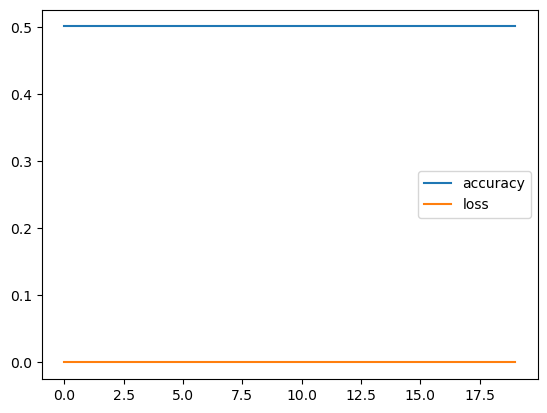

In [79]:
metrics_df = pd.DataFrame(h1.history)
metrics_df.plot()
plt.show()